In [1]:
# Importing different libraries
#
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# sklearn library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn import svm

In [2]:
# Importing the data
#
df = pd.read_spss('LEVEL1_2_3_4_14.sav')
df, meta = pyreadstat.read_sav('LEVEL1_2_3_4_14.sav')
type(df)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
# pd.set_option("max_rows", 30)
df

,USLN,cen_roun,fsu_no,round,sch_no,sample,sector,state,s_regon,distric,stratum,sub_stno,sub_rnd,fod_subr,sss,hhd_no,visit_no,level,filler,sr_l14,yr_l14,lon_l14,amt_l14,cr_l14,lnd_l14,ten_l14,int_l14,ari_l14,pur_l14,sec_l14,amt1_l14,amt2_l14,outs_l14,outs1_l14,nsc,mlt,inf_slno,res_cd,sur_cd,sub_cd,em_cd,em_cd1,em_cd2,dos,dod,tim_c,no_inv,remark,remark1,remark2,remark3,ins_pol,hhs_siz,relgn,soc_grp,hhs_typ,hom_lnd,lnd_own,lesd_in,oth_pos,leas_out,agr_act,area_op,kitchen,pmjby,pmsby,apy,uce,imp_hg,imp_gft,exp_dur,mce,per_l2,rel,gender,age,edu,h_cb,h_po,nbfc,shg,non_in,lnd_l2,ag_l2,crd_l2,crd_u,e_walt,u_ewal
0,5.003484e+09,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,14.0,0.0,1.0,2017.0,1.0,45000.0,3.0,9.0,3.0,1.0,0.0,1.0,1.0,13000.0,NaN,12000.0,25000.0,2.0,351750.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,170719.0,10819.0,75.0,2.0,2.0,NaN,2.0,2.0,0.0,5.0,1.0,1.0,1.0,0.02,0.82,NaN,NaN,NaN,1.0,0.80,0.0,0.0,0.0,0.0,12000.0,1200.0,650.0,8500.0,14558.0,1.0,1.0,1.0,48.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN
1,5.003484e+09,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,14.0,0.0,2.0,2019.0,2.0,20000.0,8.0,9.0,2.0,3.0,28.0,12.0,2.0,1380.0,NaN,19093.0,NaN,2.0,351750.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,170719.0,10819.0,75.0,2.0,2.0,NaN,2.0,2.0,0.0,5.0,1.0,1.0,1.0,0.02,0.82,NaN,NaN,NaN,1.0,0.80,0.0,0.0,0.0,0.0,12000.0,1200.0,650.0,8500.0,14558.0,1.0,1.0,1.0,48.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN
2,5.003484e+09,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,14.0,0.0,51.0,2018.0,2.0,3000.0,18.0,NaN,2.0,NaN,0.0,12.0,2.0,2000.0,NaN,1000.0,NaN,2.0,351750.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,170719.0,10819.0,75.0,2.0,2.0,NaN,2.0,2.0,0.0,5.0,1.0,1.0,1.0,0.02,0.82,NaN,NaN,NaN,1.0,0.80,0.0,0.0,0.0,0.0,12000.0,1200.0,650.0,8500.0,14558.0,1.0,1.0,1.0,48.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN
3,5.003484e+09,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,14.0,0.0,99.0,NaN,NaN,68000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16380.0,NaN,32093.0,25000.0,2.0,351750.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,170719.0,10819.0,75.0,2.0,2.0,NaN,2.0,2.0,0.0,5.0,1.0,1.0,1.0,0.02,0.82,NaN,NaN,NaN,1.0,0.80,0.0,0.0,0.0,0.0,12000.0,1200.0,650.0,8500.0,14558.0,1.0,1.0,1.0,48.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN
4,5.003484e+09,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,2.0,1.0,14.0,0.0,1.0,2019.0,2.0,50000.0,8.0,9.0,2.0,3.0,24.0,12.0,1.0,2232.0,NaN,44920.0,NaN,2.0,351750.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,160719.0,10819.0,80.0,2.0,2.0,2.0,2.0,2.0,0.0,4.0,1.0,1.0,1.0,0.14,1.14,NaN,NaN,NaN,1.0,1.00,0.1,0.0,0.0,0.0,9500.0,1100.0,450.0,4200.0,11400.0,1.0,1.0,1.0,22.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178966,8.000287e+09,771.0,79999.0,77.0,182.0,1.0,2.0,19.0,195.0,22.0,22.0,1.0,1.0,1913.0,4.0,2.0,1.0,14.0,0.0,99.0,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10000.0,0.0,2.0,62500.0,2.0,4.0,1.0,NaN,7566.0,5525.0,NaN,250419.0,270519.0,120.0,1.0,2.0,2.0,2.0,2.0,NaN,4.0,1.0,2.0,3.0,0.02,0.02,NaN,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.0,6800.0,0.0,60.0,4550.0,7239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178967,8.000287e+09,771.0,79999.0,77.0,182.0,1.0,2.0,19.0,195.0,22.0,22.0,1.0,1.0,1913.0,5.0,1.0,1.0,14.0,0.0,51.0,2015.0,1.0,50000.0,18.0,NaN,3.0,NaN,0.0,10.0,2.0,NaN,NaN,25000.0,25000.0,2.0,9375.0,1.0,4.0,1.0,NaN,7566.0,5525.0,NaN,250419.0,270519.0,118.0,1.0,2.0,2.0,2.0,2.0,NaN,6.0,1.0,2.0,3.0,0.02,0.02,NaN,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.0,7400.0,0.0,250.0,5000.0,8067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [3]:
# df.rename(columns = {'relgn':'religion'}, inplace = True)
# df.rename(columns = {'mce':'expenditure'}, inplace = True)


In [4]:
df1 = df[['age', 'edu','gender', 'relgn', 'soc_grp', 'lnd_l2', 'hhs_typ', 'mce', 'amt_l14','crd_l2', 'e_walt', 'lon_l14']]

In [5]:
df1

,age,edu,gender,relgn,soc_grp,lnd_l2,hhs_typ,mce,amt_l14,crd_l2,e_walt,lon_l14
0,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,45000.0,2.0,2.0,1.0
1,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,20000.0,2.0,2.0,2.0
2,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,3000.0,2.0,2.0,2.0
3,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,68000.0,2.0,2.0,NaN
4,22.0,3.0,1.0,1.0,1.0,1.0,1.0,11400.0,50000.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178966,NaN,NaN,NaN,1.0,2.0,NaN,3.0,7239.0,10000.0,NaN,NaN,NaN
178967,NaN,NaN,NaN,1.0,2.0,NaN,3.0,8067.0,50000.0,NaN,NaN,1.0
178968,NaN,NaN,NaN,1.0,2.0,NaN,3.0,8067.0,50000.0,NaN,NaN,NaN
178969,NaN,NaN,NaN,1.0,9.0,NaN,1.0,7217.0,100000.0,NaN,NaN,1.0


In [6]:
df1.isnull().sum()

age        68778
edu        68782
gender     68778
relgn          0
soc_grp        0
           ...  
mce            0
amt_l14        1
crd_l2     68788
e_walt     68788
lon_l14    72938
Length: 12, dtype: int64

In [7]:
df1 = df1.dropna(subset =['lon_l14'])

In [8]:
df1.isnull().sum()

age        40451
edu        40453
gender     40451
relgn          0
soc_grp        0
           ...  
mce            0
amt_l14        0
crd_l2     40456
e_walt     40456
lon_l14        0
Length: 12, dtype: int64

In [9]:
df1['age'].fillna(df1['age'].mode()[0], inplace=True)

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
df1['edu'].fillna(df1['edu'].mode()[0], inplace=True)

In [11]:
df1['gender'].fillna(df1['gender'].mode()[0], inplace=True)

In [12]:
df1['lnd_l2'].fillna(df1['lnd_l2'].mode()[0], inplace=True)

In [13]:
df1['crd_l2'].fillna(df1['crd_l2'].mode()[0], inplace=True)
df1['e_walt'].fillna(df1['e_walt'].mode()[0], inplace=True)

In [14]:
pd.set_option('display.max_rows', None)
df1.isnull().sum()

age        0
edu        0
gender     0
relgn      0
soc_grp    0
lnd_l2     0
hhs_typ    0
mce        0
amt_l14    0
crd_l2     0
e_walt     0
lon_l14    0
dtype: int64

In [15]:
pd.set_option('display.max_rows', 10)
df1

,age,edu,gender,relgn,soc_grp,lnd_l2,hhs_typ,mce,amt_l14,crd_l2,e_walt,lon_l14
0,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,45000.0,2.0,2.0,1.0
1,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,20000.0,2.0,2.0,2.0
2,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,3000.0,2.0,2.0,2.0
4,22.0,3.0,1.0,1.0,1.0,1.0,1.0,11400.0,50000.0,2.0,2.0,2.0
5,22.0,3.0,1.0,1.0,1.0,1.0,1.0,11400.0,5000.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178961,45.0,1.0,1.0,1.0,9.0,1.0,1.0,12083.0,450000.0,2.0,2.0,1.0
178963,45.0,1.0,1.0,1.0,2.0,1.0,3.0,5812.0,10000.0,2.0,2.0,2.0
178965,45.0,1.0,1.0,1.0,2.0,1.0,3.0,7239.0,10000.0,2.0,2.0,2.0
178967,45.0,1.0,1.0,1.0,2.0,1.0,3.0,8067.0,50000.0,2.0,2.0,1.0


In [16]:
df1.loc[df1.lon_l14 == 2, 'lon_l14'] = 0
df1.loc[df1.crd_l2 == 2, 'crd_l2'] = 0
df1.loc[df1.e_walt == 2, 'e_walt'] = 0

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [17]:
df1

,age,edu,gender,relgn,soc_grp,lnd_l2,hhs_typ,mce,amt_l14,crd_l2,e_walt,lon_l14
0,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,45000.0,0.0,0.0,1.0
1,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,20000.0,0.0,0.0,0.0
2,48.0,2.0,1.0,1.0,1.0,1.0,1.0,14558.0,3000.0,0.0,0.0,0.0
4,22.0,3.0,1.0,1.0,1.0,1.0,1.0,11400.0,50000.0,0.0,0.0,0.0
5,22.0,3.0,1.0,1.0,1.0,1.0,1.0,11400.0,5000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178961,45.0,1.0,1.0,1.0,9.0,1.0,1.0,12083.0,450000.0,0.0,0.0,1.0
178963,45.0,1.0,1.0,1.0,2.0,1.0,3.0,5812.0,10000.0,0.0,0.0,0.0
178965,45.0,1.0,1.0,1.0,2.0,1.0,3.0,7239.0,10000.0,0.0,0.0,0.0
178967,45.0,1.0,1.0,1.0,2.0,1.0,3.0,8067.0,50000.0,0.0,0.0,1.0


In [18]:
X = df1.iloc[:,np.r_[0:11]].values
y = df1.iloc[:,np.r_[11]].values

In [19]:
X

array([[4.8e+01, 2.0e+00, 1.0e+00, ..., 4.5e+04, 0.0e+00, 0.0e+00],
       [4.8e+01, 2.0e+00, 1.0e+00, ..., 2.0e+04, 0.0e+00, 0.0e+00],
       [4.8e+01, 2.0e+00, 1.0e+00, ..., 3.0e+03, 0.0e+00, 0.0e+00],
       ...,
       [4.5e+01, 1.0e+00, 1.0e+00, ..., 1.0e+04, 0.0e+00, 0.0e+00],
       [4.5e+01, 1.0e+00, 1.0e+00, ..., 5.0e+04, 0.0e+00, 0.0e+00],
       [4.5e+01, 1.0e+00, 1.0e+00, ..., 1.0e+05, 0.0e+00, 0.0e+00]])

In [20]:
y

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [21]:
# Creating training and testing data
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print('X_train:\n',X_train, '\n Y_train:\n',y_train,'\n X_test:\n',X_test, '\n Y_test:\n',y_test )

X_train:
 [[4.5e+01 1.0e+00 1.0e+00 ... 5.0e+05 0.0e+00 0.0e+00]
 [4.5e+01 1.0e+00 1.0e+00 ... 1.0e+04 0.0e+00 0.0e+00]
 [5.6e+01 2.0e+00 1.0e+00 ... 1.0e+05 0.0e+00 0.0e+00]
 ...
 [7.2e+01 1.0e+00 2.0e+00 ... 1.0e+05 0.0e+00 0.0e+00]
 [4.5e+01 1.0e+00 1.0e+00 ... 2.7e+04 0.0e+00 0.0e+00]
 [5.5e+01 5.0e+00 1.0e+00 ... 5.0e+05 1.0e+00 0.0e+00]] 
 Y_train:
 [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] 
 X_test:
 [[4.5e+01 1.0e+00 1.0e+00 ... 1.8e+04 0.0e+00 0.0e+00]
 [4.5e+01 1.0e+00 1.0e+00 ... 1.0e+05 0.0e+00 0.0e+00]
 [4.5e+01 1.0e+00 1.0e+00 ... 3.0e+04 0.0e+00 0.0e+00]
 ...
 [4.5e+01 1.0e+00 1.0e+00 ... 1.0e+04 0.0e+00 0.0e+00]
 [4.5e+01 1.0e+00 1.0e+00 ... 1.5e+04 0.0e+00 0.0e+00]
 [4.5e+01 1.0e+00 1.0e+00 ... 5.0e+04 0.0e+00 0.0e+00]] 
 Y_test:
 [[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [22]:
# # Standardizing the data
# #
# ss=StandardScaler()
# X_train_st=ss.fit_transform(X_train)
# X_test_st=ss.fit_transform(X_test)

In [23]:
# # Normalizing the data
# #
# nz = Normalizer()
# X_train_nor = nz.fit_transform(X_train)
# X_test_nor = nz.fit_transform(X_test)

## Plotting the graphs

## Features
### Dependent : Loan repaid or not

### Independent :
#### Age
#### Gender
#### Education level
#### Religion
#### Social group
#### Land owned
#### House type
#### Credit card
#### E-wallet
#### Loan amount
#### Monthly expenditure


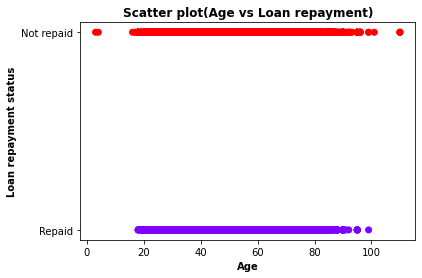

In [30]:
# Scatter plot Age vs Loan repayment
#
plt.scatter(X[:,0], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xlabel('Age',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Age vs Loan repayment)',fontweight="bold")
plt.show()

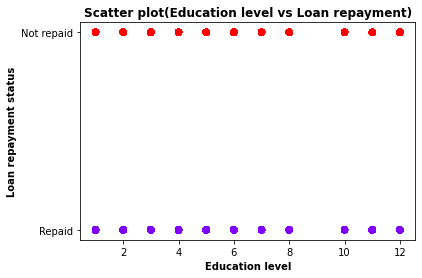

In [31]:
# Scatter plot Education vs Loan repayment
#
plt.scatter(X[:,1], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xlabel('Education level',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Education level vs Loan repayment)',fontweight="bold")
plt.show()

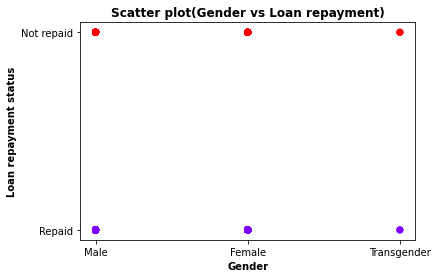

In [35]:
# Scatter plot Gender vs Loan repayment
#
plt.scatter(X[:,2], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xticks([ 1, 2, 3],['Male', 'Female', 'Transgender'])
plt.xlabel('Gender',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Gender vs Loan repayment)',fontweight="bold")
plt.show()

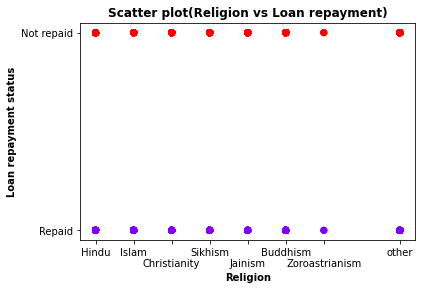

In [42]:
# Scatter plot Religion vs Loan repayment
#
plt.scatter(X[:,3], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xticks([ 1, 2, 3, 4, 5, 6, 7, 9],['Hindu', 'Islam', '\nChristianity', 'Sikhism', '\nJainism', 'Buddhism', '\nZoroastrianism', 'other'])
plt.xlabel('Religion',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Religion vs Loan repayment)',fontweight="bold")
plt.show()

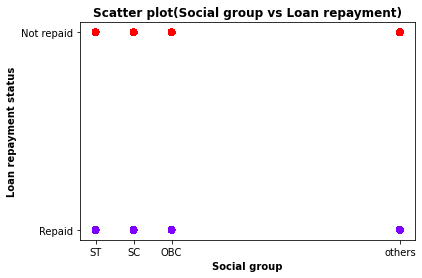

In [45]:
# Scatter plot Social group vs Loan repayment
#
plt.scatter(X[:,4], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xticks([ 1, 2, 3, 9],['ST', 'SC', 'OBC', 'others'])
plt.xlabel('Social group',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Social group vs Loan repayment)',fontweight="bold")
plt.show()

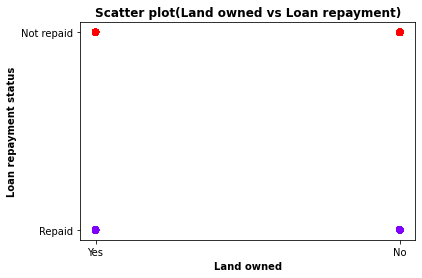

In [46]:
# Scatter plot Land owned vs Loan repayment
#
plt.scatter(X[:,5], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xticks([ 1, 2],['Yes', 'No'])
plt.xlabel('Land owned',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Land owned vs Loan repayment)',fontweight="bold")
plt.show()

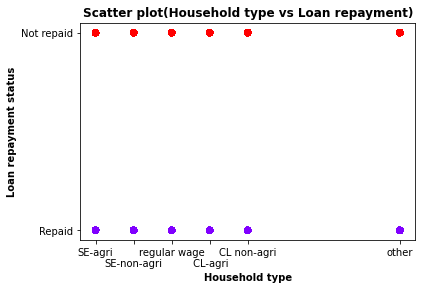

In [51]:
# Scatter plot Household type vs Loan repayment
#
plt.scatter(X[:,6], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
# SE (Self employed), CL (Casual labour)
plt.xticks([ 1, 2, 3, 4, 5, 9],['SE-agri', '\nSE-non-agri', 'regular wage', '\n CL-agri', 'CL non-agri', 'other'])
plt.xlabel('Household type',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Household type vs Loan repayment)',fontweight="bold")
plt.show()

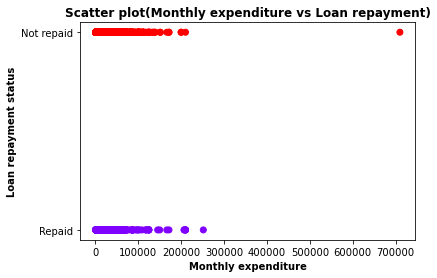

In [52]:
# Scatter plot Monthly expenditure vs Loan repayment
#
plt.scatter(X[:,7], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xlabel('Monthly expenditure',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Monthly expenditure vs Loan repayment)',fontweight="bold")
plt.show()

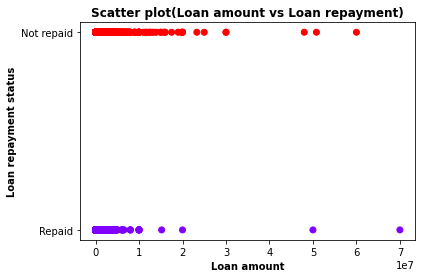

In [54]:
# Scatter plot Loan amount vs Loan repayment
#
plt.scatter(X[:,8], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xlabel('Loan amount',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Loan amount vs Loan repayment)',fontweight="bold")
plt.show()

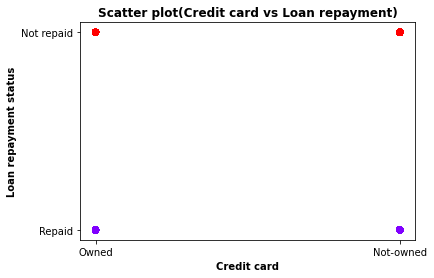

In [56]:
# Scatter plot Credit card vs Loan repayment
#
plt.scatter(X[:,9], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xticks([0,1,],['Owned', 'Not-owned'])
plt.xlabel('Credit card',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(Credit card vs Loan repayment)',fontweight="bold")
plt.show()

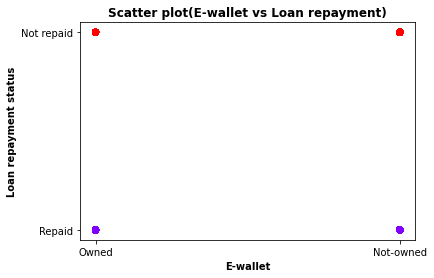

In [58]:
# Scatter plot E-wallet vs Loan repayment
#
plt.scatter(X[:,10], y, c=y, cmap='rainbow')
plt.yticks([0, 1],['Repaid', 'Not repaid'])
plt.xticks([0,1,],['Owned', 'Not-owned'])
plt.xlabel('E-wallet',fontweight="bold")
plt.ylabel('Loan repayment status',fontweight="bold")
plt.title('Scatter plot(E-wallet vs Loan repayment)',fontweight="bold")
plt.show()